# Complete Data Science Example

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Tableau 20 Colors
tableau20 = [(31, 119, 180), (174, 199, 232), 
             (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), 
             (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), 
             (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), 
             (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), 
             (23, 190, 207), (158, 218, 229)]

In [3]:
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r/255., g/255., b/255.)

In [4]:
midwest = pd.read_csv("http://goo.gl/G1K41K")
midwest = midwest[midwest.poptotal<50000]

In [7]:
midwest.head().loc[:, ['area']]

,area
1,0.014
2,0.022
3,0.017
4,0.018
5,0.050


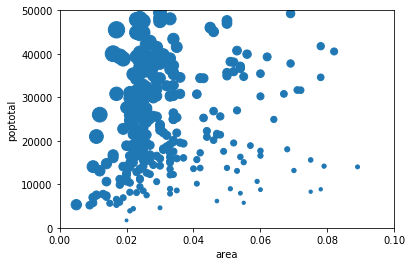

In [8]:
midwest.plot(kind='scatter', x='area',
            y='poptotal', ylim=((0, 50000)),
            xlim=((0., 0.1)),
            s=midwest['popdensity']*0.1)
plt.show()

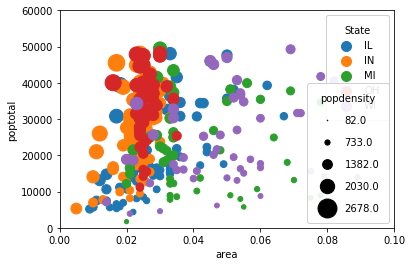

In [10]:
fig, ax = plt.subplots()
groups = midwest.groupby('state')
colors = tableau20[::2]

# Plotting each group 
for i, (name, group) in enumerate(groups):
    group.plot(kind='scatter', x='area', y='poptotal', 
               ylim=((0, 60000)), xlim=((0., 0.1)),
               s=10+group['popdensity']*0.1,
               label=name, ax=ax, color=colors[i])

# Legend for State colours
lgd = ax.legend(numpoints=1, loc=1, borderpad=1, 
                frameon=True, framealpha=0.9, 
                title="State")
for handle in lgd.legendHandles:
    handle.set_sizes([100.0])

# Make a legend for popdensity. Hand-wavy. Error prone!
pws = (pd.cut(midwest['popdensity'], bins=4, 
              retbins=True)[1]).round(0)
for pw in pws:
    plt.scatter([], [], s=(pw**2)/2e4, c="k",
                label=str(pw))

h, l = plt.gca().get_legend_handles_labels()
plt.legend(h[5:], l[5:], labelspacing=1.2, 
           title="popdensity", 
           borderpad=1, frameon=True, 
           framealpha=0.9, loc=4, numpoints=1)

plt.gca().add_artist(lgd)
plt.show()

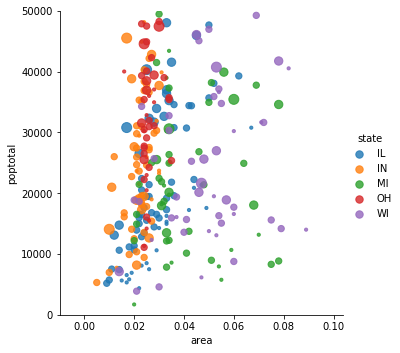

In [11]:
sizes = [10, 40, 70, 100] 
marker_size = pd.cut(midwest['popdensity'], 
                     range(0, 2500, 500), labels=sizes) 
sns.lmplot('area', 'poptotal', data=midwest, 
           hue='state', fit_reg=False, 
           scatter_kws={'s':marker_size})
plt.ylim((0, 50000))
plt.show()

In [12]:
!pip3 install altair

In [13]:
from altair import Chart
import altair as alt

In [14]:
alt.renderers.enable('default')
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [15]:
chart = Chart(midwest)

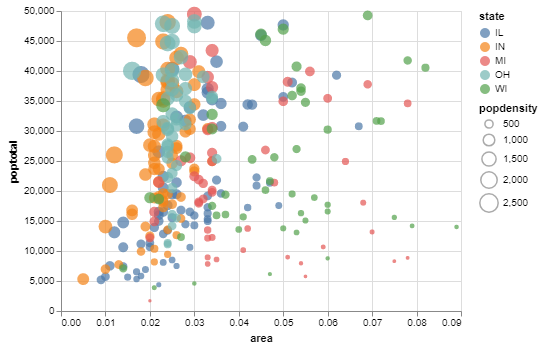

In [16]:
chart.mark_circle().encode(
x = 'area',
y = 'poptotal',
color = 'state',
size = 'popdensity')